In [133]:
import os, sys
import time

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, scale
from sklearn.linear_model import LogisticRegression

sys.path.append('../models_new')

%matplotlib inline

In [79]:
DATA_DIR = '../../data/input'

In [80]:
files = sorted(
            [f for f in os.listdir(DATA_DIR) if 'input_data' in f])

In [83]:
def _load_data_set(files):
    print('Loading data from %s...' % set_files)
    data_set = pd.read_csv('%s/%s' % (DATA_DIR, files.pop()))
    for f in files:
        next_chunk = pd.read_csv('%s/%s' % (DATA_DIR, f))
        data_set = data_set.append(next_chunk)
    data_set.index = range(data_set.shape[0])
    return data_set

In [84]:
df = _load_data_set(files)

In [85]:
df.head()

,btl_t,x,y,lon,lat,etopo1,btl_t1,btl_t2,vgt,age,...,JanMin,MarMin,winterMin,minT,cv.gsp,wd,vpd,mi,cwd,pt.coef
0,0,-450000.0,-2040000.0,-104.676159,31.434503,1227,0,0,0,0.0,...,-9.592310,-3.895158,-9.592310,-9.592310,5.318103,43.208261,370599.965327,0.489177,850.070193,0.444493
1,0,-440000.0,-2040000.0,-104.572405,31.439746,1570,0,0,0,0.0,...,-9.500338,-3.753618,-9.500338,-9.500338,4.814477,82.862624,324216.112984,0.520011,827.984870,0.483976
2,0,-430000.0,-2040000.0,-104.468639,31.444873,1308,0,0,0,0.0,...,-9.506616,-4.020869,-9.506616,-9.506616,5.160301,103.520839,338613.921435,0.533288,815.374572,0.500528
3,0,-420000.0,-2040000.0,-104.364863,31.449881,1218,0,0,0,0.0,...,-9.534417,-4.261349,-9.534417,-9.534417,5.414398,131.983995,355394.805871,0.544398,820.063490,0.497176
4,0,-410000.0,-2040000.0,-104.261077,31.454772,1167,0,0,0,0.0,...,-9.523781,-4.526200,-9.523781,-9.523781,5.535505,153.022067,365475.730930,0.553139,822.572473,0.490948


In [97]:
features=list(df)

In [98]:
drops = ['x', 'y', 'lon', 'lat', 'etopo1', 'btl_t', 'btl_t1', 'btl_t2', 'cv.gsp',
         'vgt', 'age', 'density', 'sum9_t1', 'sum9_t2', 'sum9_diff', 'year']
for var in drops:
    features.remove(var)

In [126]:
X = df.loc[:, features].values

In [100]:
y = df.loc[:,['btl_t']].values

In [101]:
features

['JanTmin',
 'MarTmin',
 'TMarAug',
 'summerTmean',
 'AugTmean',
 'AugTmax',
 'PMarAug',
 'summerP0',
 'OctTmin',
 'fallTmean',
 'Tmin',
 'Tmean',
 'Tvar',
 'TOctSep',
 'summerP1',
 'summerP2',
 'Pmean',
 'POctSep',
 'PcumOctSep',
 'PPT',
 'Lcs',
 'maxAugT',
 'summerT40',
 'OptTsum',
 'AugMaxT',
 'maxT',
 'Ecs',
 'Ncs',
 'Acs',
 'drop0',
 'drop5',
 'drop10',
 'drop15',
 'drop20',
 'drop20plus',
 'max.drop',
 'ddAugJul',
 'ddAugJun',
 'Oct20',
 'Oct30',
 'Oct40',
 'Jan20',
 'Jan30',
 'Jan40',
 'Mar20',
 'Mar30',
 'Mar40',
 'winter20',
 'winter30',
 'winter40',
 'OctMin',
 'JanMin',
 'MarMin',
 'winterMin',
 'minT',
 'wd',
 'vpd',
 'mi',
 'cwd',
 'pt.coef']

In [127]:
x = StandardScaler().fit_transform(X)

In [103]:
pd.DataFrame(data = x, columns = features).head()

,JanTmin,MarTmin,TMarAug,summerTmean,AugTmean,AugTmax,PMarAug,summerP0,OctTmin,fallTmean,...,OctMin,JanMin,MarMin,winterMin,minT,wd,vpd,mi,cwd,pt.coef
0,1.060527,1.345034,1.958428,1.741711,1.499321,1.264797,-0.536290,-0.234438,1.654739,1.726824,...,1.261311,0.954115,1.057800,1.224785,1.238508,-0.547413,1.631841,-0.517950,1.267002,-1.148878
1,0.896254,1.044617,1.554319,1.308572,1.074227,0.915308,-0.367897,0.071911,1.236084,1.417142,...,1.207237,0.961363,1.070139,1.232363,1.246060,-0.517101,1.220005,-0.489012,1.198110,-1.011876
2,0.991229,1.227345,1.831301,1.598911,1.375330,1.160832,-0.441356,-0.137480,1.492733,1.612857,...,1.219439,0.960868,1.046841,1.231846,1.245545,-0.501309,1.347841,-0.476552,1.158773,-0.954439
3,1.015617,1.306708,1.944323,1.718215,1.499673,1.261758,-0.496955,-0.249935,1.595788,1.699392,...,1.247980,0.958677,1.025877,1.229555,1.243262,-0.479551,1.496837,-0.466125,1.173400,-0.966073
4,1.040093,1.351702,2.022665,1.798032,1.584666,1.337107,-0.546506,-0.340702,1.657820,1.751416,...,1.247162,0.959515,1.002788,1.230432,1.244135,-0.463469,1.586344,-0.457922,1.181226,-0.987681


In [149]:
pca = PCA(.80)

In [150]:
principalComponents = pca.fit_transform(x)

In [151]:
loadings = pca.components_
loadings.shape

(8, 60)

In [153]:
loadings = pd.DataFrame(loadings, columns=features)
loadings.head()

,JanTmin,MarTmin,TMarAug,summerTmean,AugTmean,AugTmax,PMarAug,summerP0,OctTmin,fallTmean,...,OctMin,JanMin,MarMin,winterMin,minT,wd,vpd,mi,cwd,pt.coef
0,-0.163298,-0.173213,-0.174575,-0.160547,-0.164893,-0.167689,0.089485,0.128546,-0.151366,-0.179936,...,-0.148231,-0.167034,-0.169804,-0.170707,-0.171870,0.053394,-0.167251,0.056074,-0.173053,0.160316
1,0.123993,0.078536,-0.068454,-0.122856,-0.107086,-0.112847,0.237222,0.094587,0.012519,-0.012784,...,0.045532,0.103862,0.090452,0.098163,0.094991,0.264428,-0.109138,0.251658,-0.091807,0.117949
2,0.065582,0.066662,0.131879,0.141871,0.125576,0.018052,0.130519,0.141456,0.269860,0.139531,...,0.183534,0.025688,0.000814,0.063931,0.064083,0.116535,0.127800,0.127485,-0.018056,0.056274
3,0.016952,-0.074385,-0.102890,-0.094426,-0.096254,-0.065839,-0.144457,-0.267278,-0.062131,-0.064114,...,-0.003816,0.090204,0.006743,0.102345,0.100205,0.029639,0.007206,0.022013,0.039732,-0.035790
4,0.054651,0.072341,-0.025426,-0.062586,-0.064787,-0.053363,-0.065278,-0.087970,-0.012910,-0.002940,...,-0.091711,-0.012507,0.072904,-0.010097,-0.009372,0.055177,0.025662,0.057238,0.033357,0.006591


In [162]:
for pc in range(8):
    print('\nPC: %d\n%s' % (pc + 1, loadings.loc[pc,][loadings.loc[pc, ].argsort()]))


PC: 1
TOctSep       -0.184072
Tmean         -0.183922
fallTmean     -0.179936
TMarAug       -0.174575
MarTmin       -0.173213
cwd           -0.173053
Tmin          -0.172030
minT          -0.171870
winterMin     -0.170707
MarMin        -0.169804
AugTmax       -0.167689
vpd           -0.167251
JanMin        -0.167034
ddAugJul      -0.166021
ddAugJun      -0.165930
AugTmean      -0.164893
JanTmin       -0.163298
summerTmean   -0.160547
OctTmin       -0.151366
maxT          -0.150208
OctMin        -0.148231
AugMaxT       -0.147023
OptTsum       -0.132206
maxAugT       -0.127789
drop5         -0.095029
summerT40     -0.081875
drop0         -0.032425
Oct40          0.000574
drop20plus     0.009878
Oct30          0.010304
Oct20          0.030440
Mar40          0.035123
PPT            0.037253
POctSep        0.041072
PcumOctSep     0.042716
Pmean          0.043466
drop20         0.044410
wd             0.053394
mi             0.056074
Jan40          0.074008
winter40       0.080224
Ecs      

In [120]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4',
                          'PC 5', 'PC 6', 'PC 7', 'PC 8'])

In [121]:
principalDf.head(5)

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8
0,-6.675573,-1.658676,2.053564,-2.953101,1.256907,-0.713916,0.416895,0.910840
1,-5.764172,-0.859012,1.328193,-2.063689,0.567404,-0.375974,0.789942,0.589162
2,-6.288515,-1.178205,1.626543,-2.123473,0.516739,-0.262354,0.738625,0.550476
3,-6.481825,-1.547133,1.980402,-2.759341,0.965692,-0.411753,0.590209,0.844834
4,-6.677203,-1.644935,2.012736,-2.384332,0.525041,-0.003905,0.609735,0.613342


In [122]:
finalDf = principalDf.copy()
finalDf['target'] = y
finalDf.head(5)

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,target
0,-6.675573,-1.658676,2.053564,-2.953101,1.256907,-0.713916,0.416895,0.910840,0
1,-5.764172,-0.859012,1.328193,-2.063689,0.567404,-0.375974,0.789942,0.589162,0
2,-6.288515,-1.178205,1.626543,-2.123473,0.516739,-0.262354,0.738625,0.550476,0
3,-6.481825,-1.547133,1.980402,-2.759341,0.965692,-0.411753,0.590209,0.844834,0
4,-6.677203,-1.644935,2.012736,-2.384332,0.525041,-0.003905,0.609735,0.613342,0


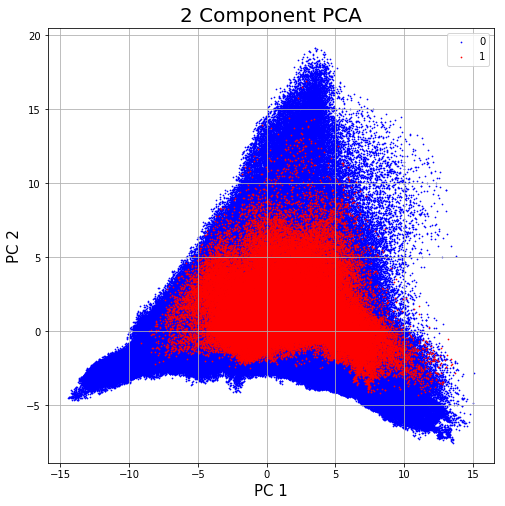

In [123]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = [0, 1]
colors = ['b','r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC 1']
               , finalDf.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 0.5)
ax.legend(targets)
ax.grid()

In [124]:
pca.explained_variance_ratio_

array([0.45300226, 0.16290242, 0.06041178, 0.03996589, 0.02825708,
       0.0247505 , 0.01940633, 0.01897475])

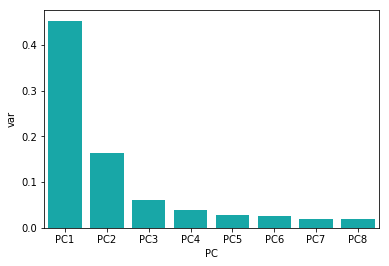

In [134]:
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8']})
sns.barplot(x='PC',y="var", 
           data=df, color="c");